# 线性回归

线性回归是回归问题中最简单的回归方法，在线性回归中，我们假定标签和特征之间的关系是线性关系。下面从单变量线性回归开始，描述线性回归模型的定义、损失函数的计算，以及如何训练模型，并最终扩展到多变量线性回归。

## 1. 单变量线性回归

### 1.1 模型

在单变量线性回归中，模型是一个线性函数：$ \hat{y}^{(i)} = x^{(i)} w + b $，式中 $ w $ 表示权重（weight）、$ b $ 表示偏差（bias）。但是，上式仅适合对每个输入 $ x^{(i)} $ 单独计算输出值 $ \hat{y}^{(i)} $，下面我们将该式转化成线性代数中行列式的计算方式：

$$
\begin{aligned}
\hat{y}^{(i)} &= x^{(i)} w + 1 * b \\
&= \begin{bmatrix} x^{(i)} & 1 \end{bmatrix} \begin{bmatrix} w \\ b \end{bmatrix} 
\end{aligned}
$$

这样对于多个输入 $ x^{(1)}, x^{(2)}, x^{(3)}, ..., x^{(n)} $，就可以写成

$$
\begin{bmatrix}
x^{(1)} & 1 \\
x^{(2)} & 1 \\
\vdots & \vdots \\
x^{(n)} & 1 \\
\end{bmatrix} 
\begin{bmatrix} w \\ b \end{bmatrix} =
\begin{bmatrix}
\hat{y}^{(1)} \\
\hat{y}^{(2)} \\
\vdots \\
\hat{y}^{(n)} \\
\end{bmatrix} 
$$


### 1.2 损失函数

当模型确定后，可以使用 0 或随机数对模型中的参数初始化，这样，对于每个输入 $ x^{(i)} $，模型都有唯一确定的输出作为预测值 $ \hat{y}^{(i)} $。但是，预测值和真实值之间总是会存在一些误差，通常，我们会选择一个非负数作为误差，并且数值越小表示误差越小，一个常用的选择是平方函数。

$$ \ell^{(i)}\left(w, b\right)=\frac{1}{2}\left(\hat{y}^{(i)}-y\right)^{2} $$

模型在训练数据集上的平均损失为：

$$ \ell\left(w, b\right) = \frac{1}{n} \sum_{i=1}^{n} \ell^{(i)}\left(w, b\right) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2}\left(x^{(i)} w + b - y^{(i)}\right)^{2} $$

模型训练的目标就是找到一组参数 $ w^{*}, b^{*} $，使得训练样本平均损失最小：

$$ w^{*}, b^{*}=\underset{w, b}{\operatorname{argmin}} \ell\left(w, b\right) $$

在这个问题中，因为模型较为简单，使得训练样本平均损失最小的 $ w^{*}, b^{*} $ 可以通过公式表达出来，这种解称为**解析解**。但是，多数模型，尤其是深度模型远比这个模型要复杂，其并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的数值，这类解称为**数值解**。

### 1.3 批量梯度下降

批量梯度下降是深度学习中广泛使用的一种模型参数优化算法，其算法较为简单：先（随机）选取一组模型参数的初始值，然后对模型参数进行迭代，使每次迭代都有可能降低损失函数的值。在每次迭代中，先随机均匀采样⼀个由固定数⽬训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后⽤此结果与预先设定的⼀个正数的乘积作为模型参数在本次迭代的减小量。

$$ w \leftarrow w - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}\left(w, b\right)}{\partial w} = w - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} x^{(i)}\left(x^{(i)} w + b - y^{(i)}\right) $$

$$ b \leftarrow b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}\left(w, b\right)}{\partial b} = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}}\left(x^{(i)} w + b - y^{(i)}\right) $$

> 在上面的计算中，需要先计算每个参数的偏导然后再做赋值操作

## 2. 练习
导入需要使用的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据集.

In [2]:
path = 'dataset/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()  #预览数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


数据可视化，绘制散点图

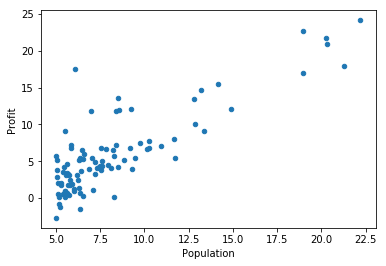

In [4]:
data.plot(kind='scatter', x='Population', y='Profit')
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\]

In [5]:
def computeCost(X, y, theta):
    # your code here  (appro ~ 2 lines)
    y_hat = np.dot(X, theta.transpose())
    err = y_hat - y
    cost = np.sum(np.multiply(err, err)) / 2 / X.shape[0]
    return cost

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [6]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1] #X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols] #X是所有行，最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [8]:
X.head() #head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta，即把theta所有元素都设置为0.

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.zeros((1, 2))

theta 是一个(1,2)矩阵

In [11]:
theta

array([[0., 0.]])

看下维度

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [13]:
computeCost(X, y, theta)

32.072733877455676

批量梯度下降（batch gradient decent）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

$$ j=0 : \frac{\partial}{\partial \theta_{0}} J\left(\theta_{0}, \theta_{1}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) $$

$$ j=1 : \frac{\partial}{\partial \theta_{1}} J\left(\theta_{0}, \theta_{1}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \cdot x^{(1)} $$

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        y_hat = np.dot(X, theta.transpose())
        y_diff = y_hat - y
        for j in range(parameters):
            theta[0][j] -= alpha * np.dot(X[:, j].transpose(), y_diff)[0][0]
            
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [15]:
alpha = 0.00015
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [16]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

array([[-3.6081476 ,  1.16413776]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [17]:
computeCost(X, y, g)

4.4845033308520295

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

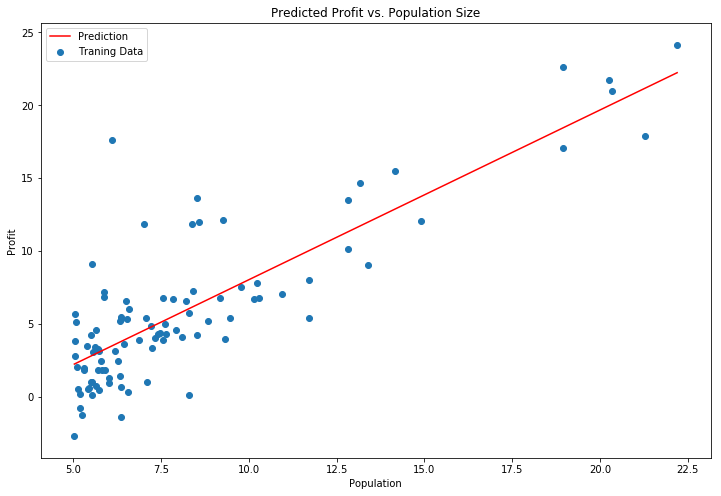

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

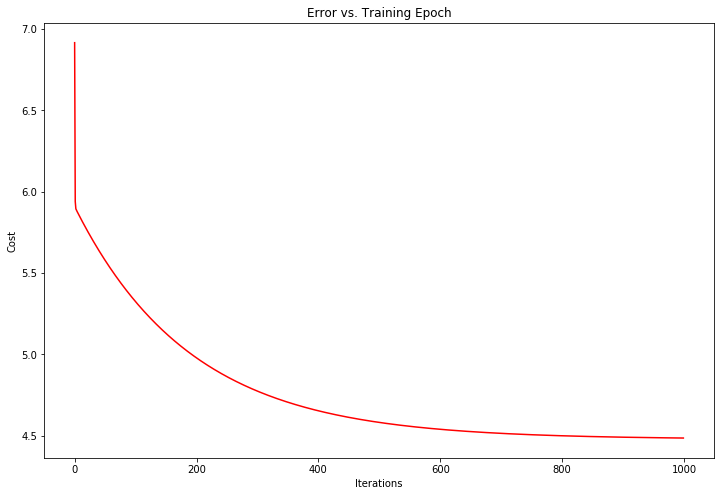

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3.多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [20]:
path =  'dataset/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [21]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [22]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.zeros((1,3))

print(theta2.shape)
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

(1, 3)


0.13090284972883595

我们也可以快速查看这一个的训练进程。

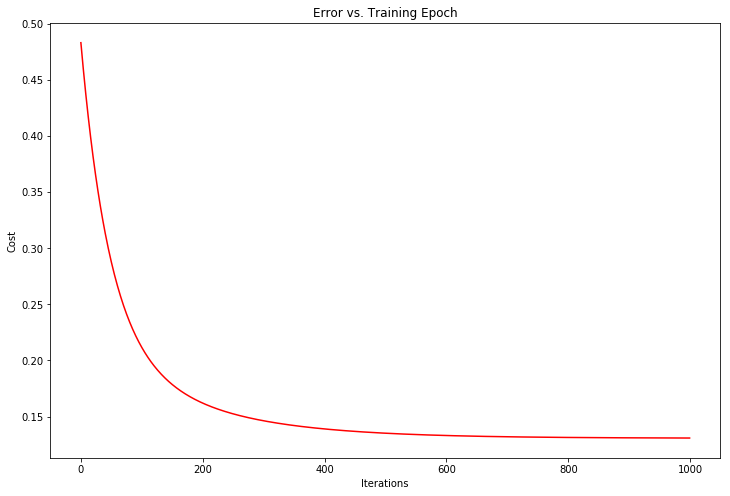

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [ ]:
# 正规方程
def normalEqn(X, y):
    # your code here  (appro ~ 1 lines)
    
    return theta

In [ ]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

In [ ]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])